In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Carregar o conjunto de dados
df = pd.read_csv('../../Processados/heart_final.csv')
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
# Separar x e y
X = df.drop(columns=['target'])
y = df['target']


## Técnica de reamostragem: Stratified K-Fold Cross Validation

O uso de K-fold Cross Validation é crucial em conjuntos de dados desbalanceados para garantir uma avaliação robusta e não enviesada do modelo. Como uma das classes apresenta a proporção de 0.54276315789, mesmo que a diferença é pouca achamos necessário manter a proporção para que a amostragem de treinamento possa ser o mais parecido possivel com o dataset. 

In [59]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=958)

# Exemplo de uso
print("Proporção de '1' na população total:", y.mean())
print("Proporção de '1' nos dados de treino:", y_train.mean())
print("Proporção de '1' nos dados de teste:", y_test.mean())

Proporção de '1' na população total: 0.543046357615894
Proporção de '1' nos dados de treino: 0.5414364640883977
Proporção de '1' nos dados de teste: 0.5454545454545454


In [60]:
# Criar o classificador de árvore de decisão
clf = DecisionTreeClassifier(random_state=42)

# Treinar o modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

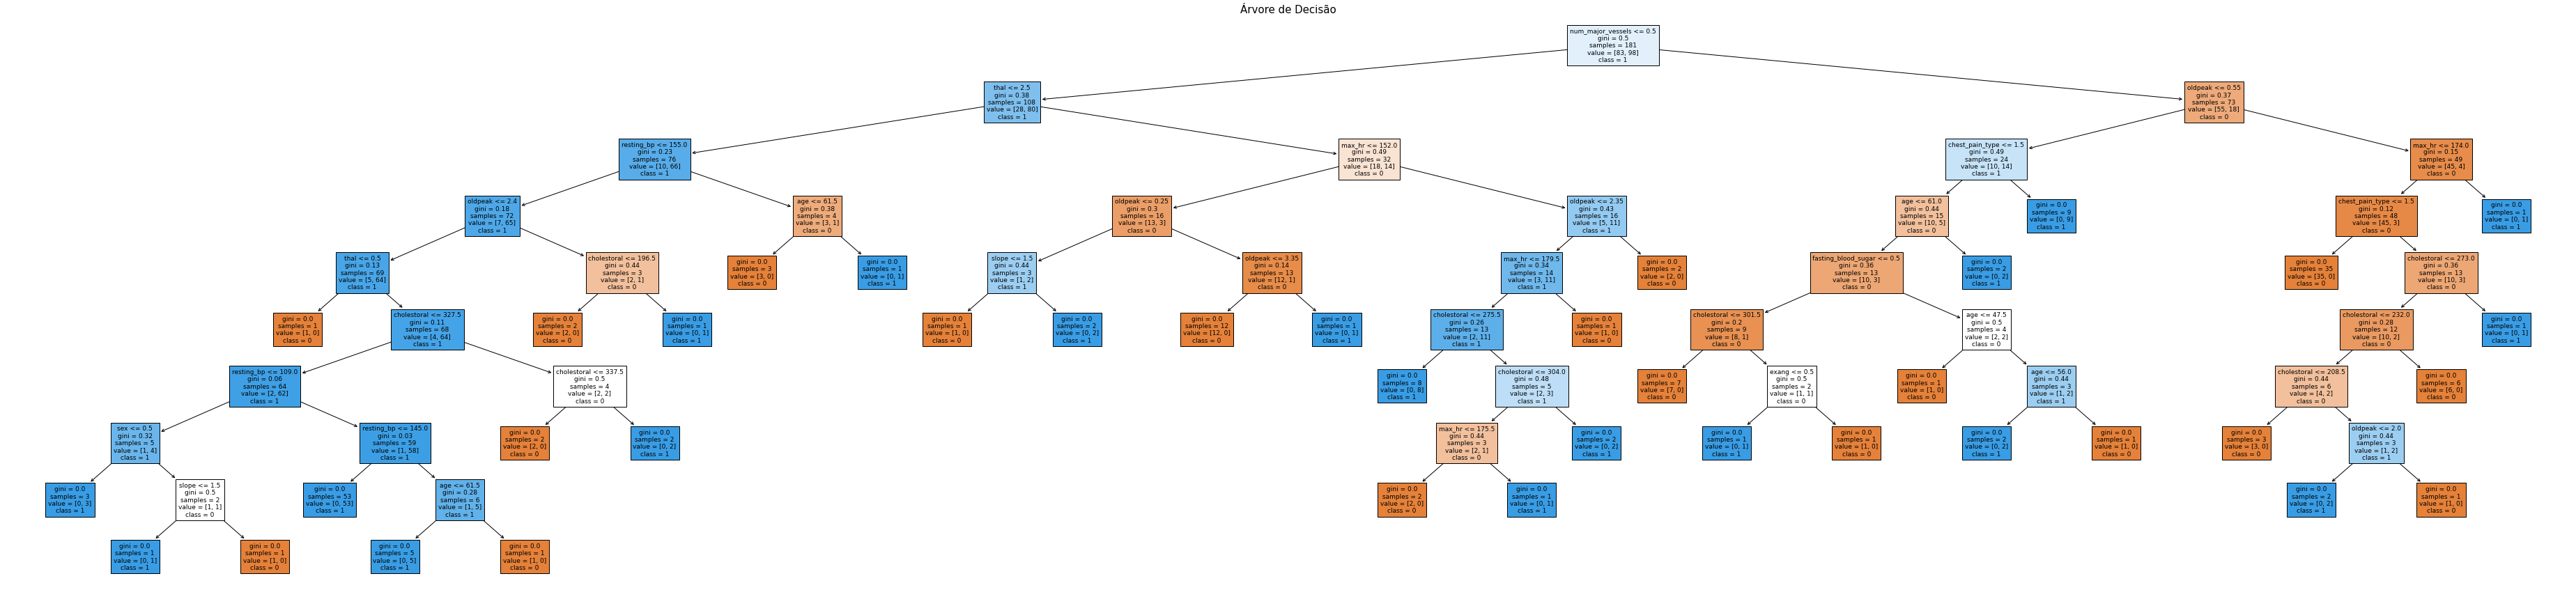

In [61]:
plt.figure(figsize=(66, 15))  # Tamanho da figura
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1'], fontsize=9, precision=2)
plt.title("Árvore de Decisão", fontsize=15)  # Título da árvore
plt.savefig('arvore_decisao.png', format='png', dpi=400)  
plt.show()

In [62]:
# Previsões nos dados de treino e teste
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


print(f'Acurácia nos dados de treino: {accuracy_score(y_train, y_train_pred)}')
print(f'Acurácia nos dados de teste:  {accuracy_score(y_test, y_test_pred)}')


Acurácia nos dados de treino: 1.0
Acurácia nos dados de teste:  0.7768595041322314


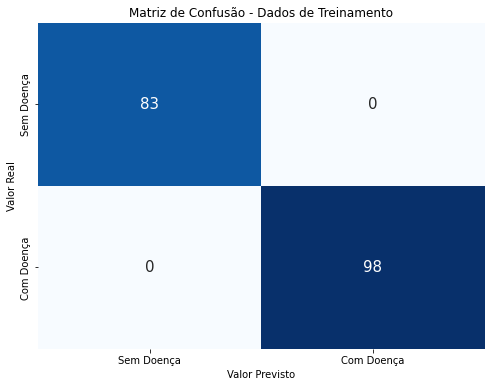

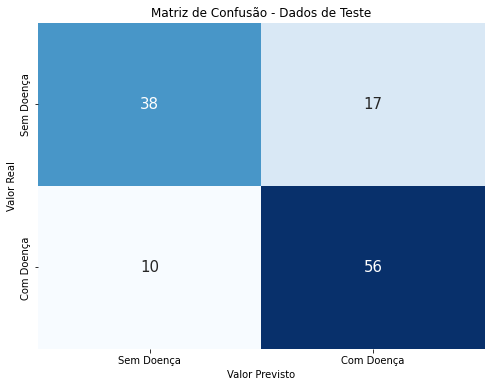

In [63]:
#Função para plotar a matrz de confusão
def plot_confusion_matrix(y_real, y_previsto, title):
    
    # Calcular
    cm = confusion_matrix(y_real, y_previsto)

    # Plotar
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
                annot_kws={'fontsize': 15}, 
                xticklabels=['Sem Doença', 'Com Doença'],
                yticklabels=['Sem Doença', 'Com Doença'])
    plt.xlabel('Valor Previsto')
    plt.ylabel('Valor Real')
    plt.title(title)
    plt.savefig(title+'.png', format='png', dpi=400)
    plt.show()


plot_confusion_matrix(y_train, y_train_pred, 'Matriz de Confusão - Dados de Treinamento')
plot_confusion_matrix(y_test, y_test_pred, 'Matriz de Confusão - Dados de Teste')
